# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 6. Dùng sklearn.datasets.make_circles để tạo ra 200 điểm dữ liệu dạng hình tròn (factor=0.1, noise=0.1).
- a. Dùng PCA và Kernel PCA để tìm phép chiếu làm dữ liệu phân tách tuyến tính.
- b. Trực quan hoá dữ liệu gốc, dữ liệu chiếu bằng PCA, dữ liệu chiếu bằng Kernel
PCA và dữ liệu tái tạo từ Kernel PCA. Nhận xét

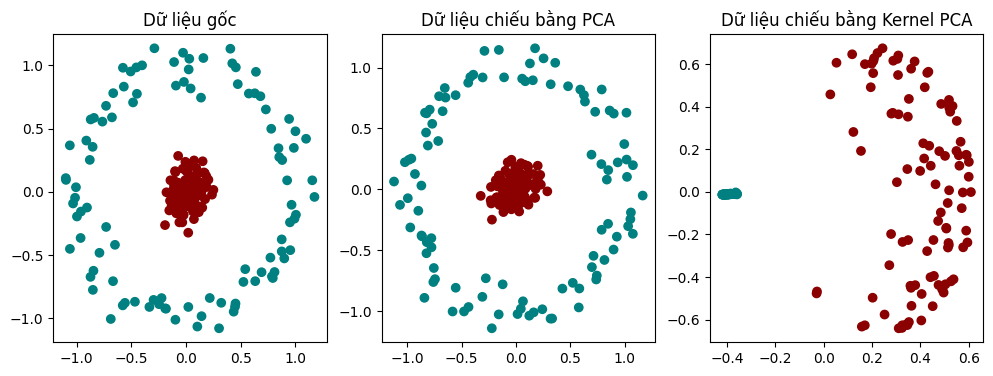

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

# Tạo dữ liệu hình tròn
X, y = make_circles(n_samples=200, factor=0.1, noise=0.1)

# a) Sử dụng PCA và Kernel PCA để tìm phép chiếu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True)
X_kernel_pca = kernel_pca.fit_transform(X)

# Tạo mảng màu tương ứng với nhãn của dữ liệu
colors = np.where(y == 0, 'teal', 'darkred')

# b) Trực quan hoá dữ liệu
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Dữ liệu gốc")
plt.scatter(X[:, 0], X[:, 1], c=colors)

plt.subplot(1, 3, 2)
plt.title("Dữ liệu chiếu bằng PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

plt.subplot(1, 3, 3)
plt.title("Dữ liệu chiếu bằng Kernel PCA")
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=colors)

plt.show()

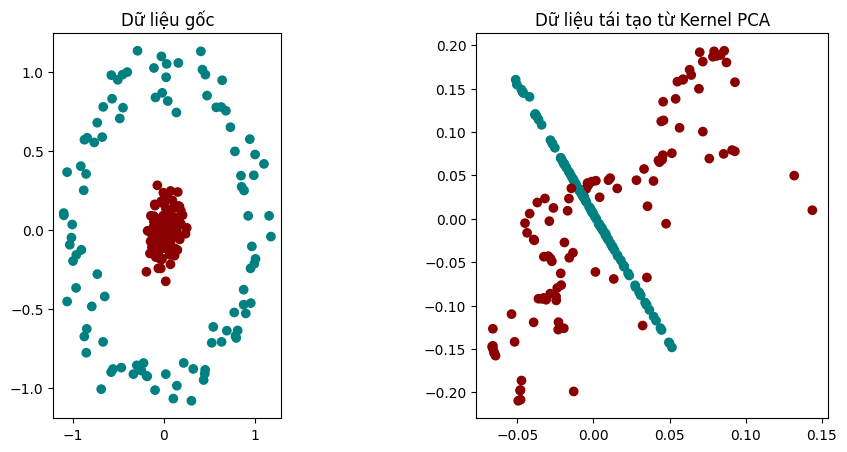

In [54]:
# Tái tạo dữ liệu từ Kernel PCA
X_reconstructed = kernel_pca.inverse_transform(X_kernel_pca)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Dữ liệu gốc")
plt.scatter(X[:, 0], X[:, 1], c=colors)

plt.subplot(1, 2, 2)
plt.title("Dữ liệu tái tạo từ Kernel PCA")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=colors)

plt.show()


Ta nhận thấy hầu như Classical PCA không giải quyết được vấn đề gặp phải. Cần phải sử dụng Kernel PCA để tách rời 2 lable dữ liệu ra. 

## Bài 7. Tương tự bài trên cho sklearn.datasets.make_moons.

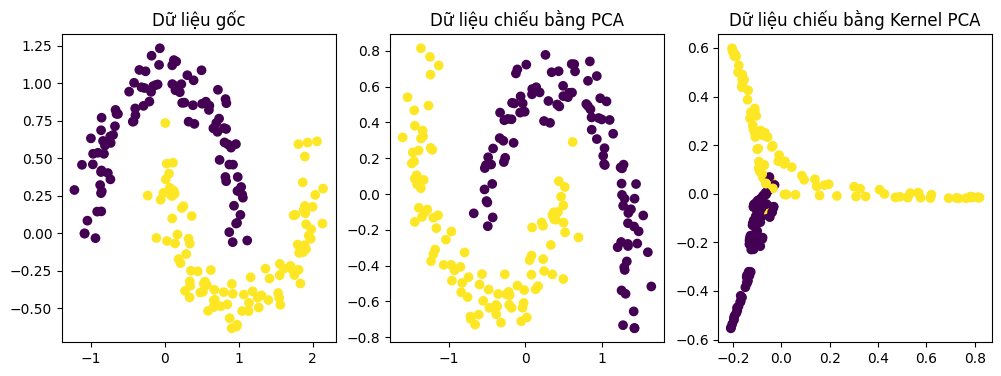

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, KernelPCA

# Tạo dữ liệu hình mặt trăng
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Sử dụng PCA và Kernel PCA để tìm phép chiếu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True)
X_kernel_pca = kernel_pca.fit_transform(X)

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Dữ liệu gốc")
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(1, 3, 2)
plt.title("Dữ liệu chiếu bằng PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.subplot(1, 3, 3)
plt.title("Dữ liệu chiếu bằng Kernel PCA")
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y)

plt.show()

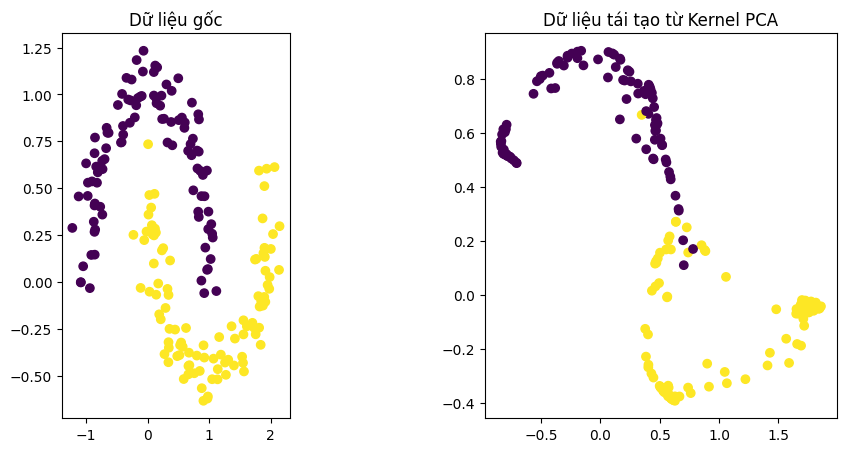

In [59]:
# Tái tạo dữ liệu từ Kernel PCA
X_reconstructed = kernel_pca.inverse_transform(X_kernel_pca)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Dữ liệu gốc")
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(1, 2, 2)
plt.title("Dữ liệu tái tạo từ Kernel PCA")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y)

plt.show()

Dựa trên trực quan hoá dữ liệu gốc và dữ liệu được chiếu bằng PCA và Kernel PCA, chúng ta có thể rút ra một số nhận xét như sau:

Dữ liệu gốc: Trong biểu đồ dữ liệu gốc, chúng ta thấy hai lớp dữ liệu có hình dạng hình mặt trăng. Hai lớp này không thể phân tách tuyến tính bằng một đường thẳng.

Dữ liệu chiếu bằng PCA: Trong biểu đồ PCA, dữ liệu đã được chiếu xuống không gian hai chiều mới sao cho phương sai của dữ liệu được tối đa hóa. Tuy nhiên, dữ liệu vẫn không thể phân tách tuyến tính vì các lớp vẫn gần nhau và không thể tách rời bằng một đường thẳng.

Dữ liệu chiếu bằng Kernel PCA: Trong biểu đồ Kernel PCA, dữ liệu đã được chiếu xuống không gian hai chiều mới sử dụng một hàm kernel phi tuyến tính. Chúng ta thấy rằng dữ liệu đã được phân tách tốt hơn so với PCA, và có thể thấy một đường ranh giới phi tuyến tính giữa hai lớp dữ liệu.

Như vậy, trong trường hợp này, Kernel PCA là phương pháp hiệu quả hơn để phân tách các lớp dữ liệu phi tuyến tính so với PCA thông thường.

## Bài 8. Tập dữ liệu Wine (trong sklearn.datasets.load_wine) là kết quả phân tích hóa học về rượu vang được trồng trong cùng một vùng ở Ý bởi ba người nông dân.
- a. Áp dụng các kernel khác nhau cho Kernel PCA, trực quan hoá và nhận xét.
- b. Giảm chiều dữ liệu bằng PCA, trực quan hoá và so sánh với kết quả câu a.

### Phần a: Áp dụng các kernel khác nhau cho Kernel PCA và trực quan hoá

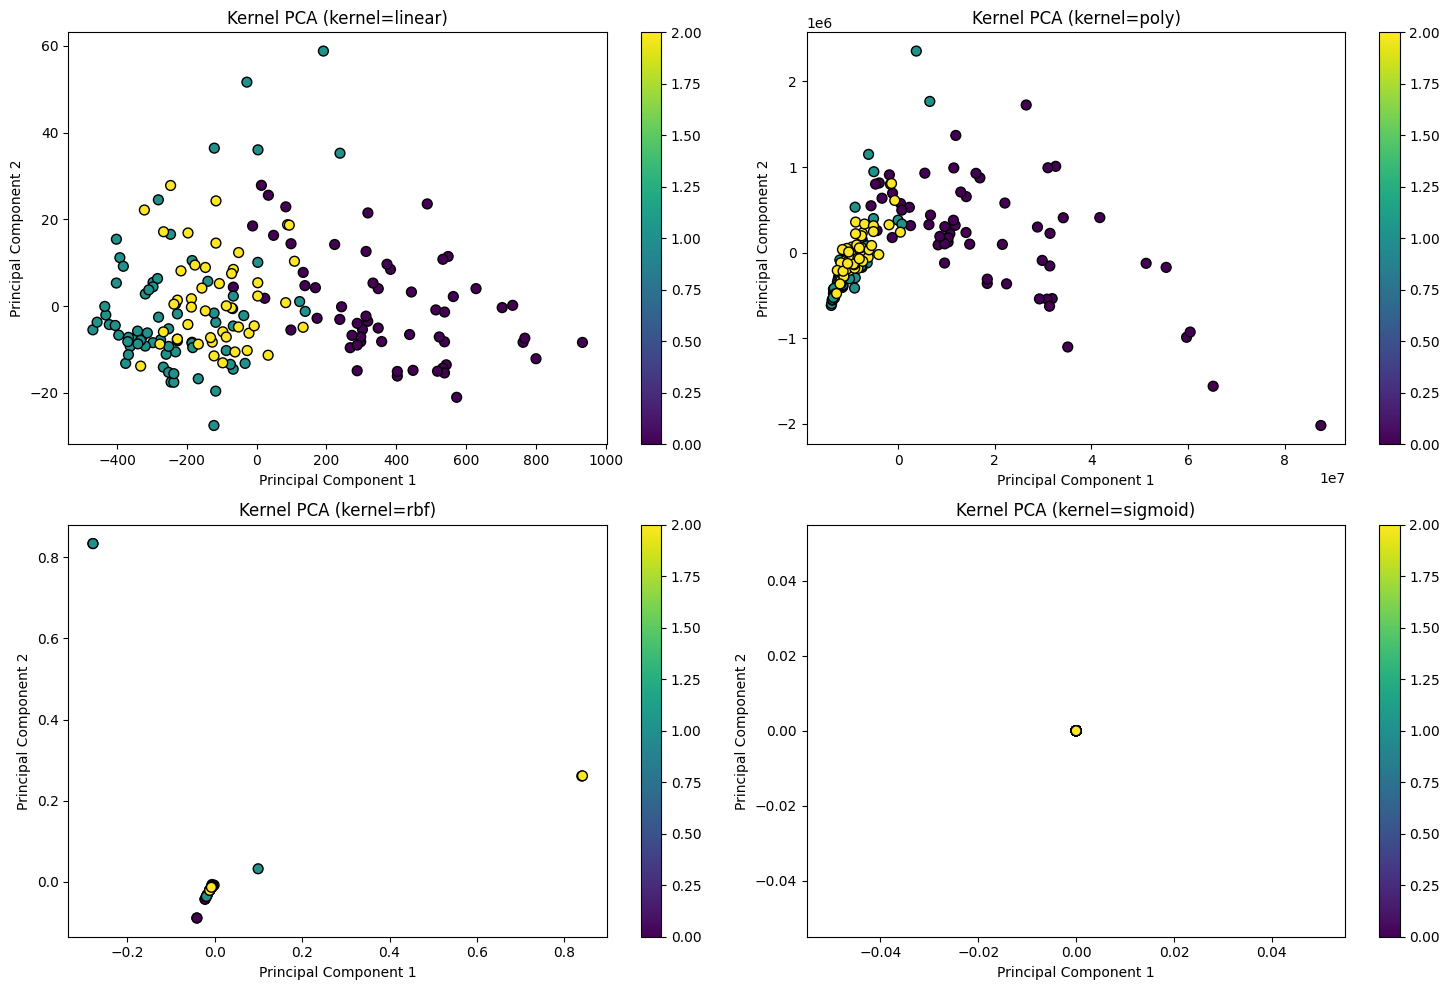

In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import KernelPCA

# Load dữ liệu Wine
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Áp dụng các kernel khác nhau cho Kernel PCA
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X)
    
    plt.subplot(2, 2, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    plt.title(f'Kernel PCA (kernel={kernel})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
plt.tight_layout()
plt.show()

### Phần b: Giảm chiều dữ liệu bằng PCA và trực quan hoá

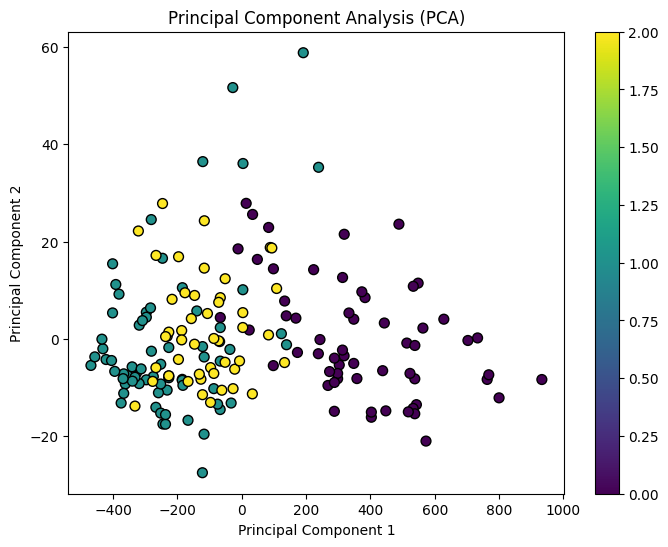

In [61]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Trực quan hoá dữ liệu PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Nhận xét:

Phần a: Với Kernel PCA và các kernel khác nhau, chúng ta thấy rằng việc sử dụng các kernel khác nhau sẽ tạo ra các phép chiếu khác nhau của dữ liệu. Các kernel như 'linear', 'poly', và 'rbf' có thể tạo ra các phân phối dữ liệu phân tán tốt hơn trong không gian chiếu mới so với kernel 'sigmoid'. Mỗi kernel tạo ra một cách biểu diễn dữ liệu khác nhau và có thể giúp phân loại dữ liệu tốt hơn trong không gian chiếu mới.

Phần b: Khi sử dụng PCA để giảm chiều dữ liệu, chúng ta thấy rằng dữ liệu được biểu diễn trong không gian hai chiều mới sao cho các lớp dữ liệu có thể được phân tách tương đối rõ ràng. Tuy nhiên, sự phân tách không rõ ràng như trong các biểu đồ từ Kernel PCA, đặc biệt là khi sử dụng kernel 'rbf'. Điều này chỉ ra rằng việc sử dụng các kernel phi tuyến tính có thể giúp tạo ra các biểu diễn dữ liệu tốt hơn trong không gian chiếu mới so với PCA thông thường.